# A pair of Goodwin oscillators

Trying this instead of the thalamic model so that debugging isn't so goddamn slow.

In [8]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
import response as rp

import gw2

import importlib
import lib

import lib.util
import lib.rhs

importlib.reload(sys.modules['lib.util'])
importlib.reload(sys.modules['lib.rhs'])
from lib.util import (get_phase, freq_est, get_tongue_1d,
                      pl_exist_1d)
from lib.rhs import (rhs_avg_2d, _redu, _redu_moving, 
                     _redu_moving_avg, rhs_avg_1d)


from importlib import reload
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from scipy.optimize import root,bisect
from copy import deepcopy

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

reload(gw2)
reload(nm)
reload(rp)

nmc = nm.nmCoupling
rsp = rp.Response

In [3]:
pd1 = {'v1':.84,'v2':.42,'v4':.35,'v6':.35,'v8':1,
           'k1':1,'k2':1,'k3':.7,'k4':1,'k5':.7,
           'k6':1,'k7':.35,'k8':1,'K':0.5,'kc':1,
           'n':6,'L':0,'eps':0,'om':1,'om_fix':1}

In [9]:
kws1 = {'var_names':['x','y','z','v'],
        'pardict':pd1,
        'rhs':gw2.rhs,
        'coupling':gw2.coupling,
        'init':np.array([.3882,.523,1.357,.4347,24.2]),
        'TN':2000,
        'trunc_order':2,
        'z_forward':False,
        'i_forward':False,
        'i_bad_dx':[False,True,False,False],
        'max_iter':20,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':True}

In [11]:
def _full(t,y,a,eps,del1):
    pd1 = a.system1.pardict;pd2 = a.system2.pardict
    y1 = y[:4];y2 = y[4:]
    out1 = t2.rhs(t,y1,pd1,'val',0) + eps*(del1 + t2.coupling(y,pd1,'val',0))
    out2 = t2.rhs(t,y2,pd2,'val',1) + eps*t2.coupling(list(y2)+list(y1),pd2,'val',1)
    return np.array(list(out1)+list(out2))

In [12]:
def _redu(t,y,a,eps,del1):
    system1 = a.system1; system2 = a.system2
    h = 0
    for i in range(system1.miter):
        h += eps**(i+1)*(4*del1*np.mean(system1.z['dat'][i]) + system1.h['lam'][i](y) - system2.h['lam'][i](y))
    #h -= /a._m[1]
    return h*a._n[1]

* Computing LC data...
t init 24.246927361055896
self.T 6.283185307179586 omfix 3.8590183230656914
LC0 ini[0.38828611 0.52077984 1.35359717 0.12705671]
LC0 fin[0.38828611 0.52077984 1.35359717 0.12705671]
* Computing monodromy...
mon eval time 1.3319828510284424
* Floquet Exponent kappa =-0.15846659975461394
* Computing g symbolic...
* Computing g...
g0 ini[0. 0. 0. 0.]
g0 fin[0. 0. 0. 0.]
g1 ini[0.07152111 0.71700844 0.68236181 0.12315027]
g1 fin[0.07152111 0.71700844 0.68236181 0.12315027]
dx=3.21e-13, al=1.00e+00                   
g2 ini[-0.67118414  0.2564847   1.36449776 -0.08886141]
g2 fin[-0.67118414  0.2564847   1.36449776 -0.08886141]
* Computing heterogeneous terms...
* Computing z...
z0 ini[-11.84636438  -2.87882702   4.26666381  -0.        ]
z0 fin[-11.84636438  -2.87882702   4.26666381  -0.        ]
dx=6.02e-10, al=9.09e-01                   
z1 ini[ -1.07870625 -14.68206209 -22.66367644   0.        ]
z1 fin[ -1.07870625 -14.68206209 -22.66367644   0.        ]
dx=2.25e-11

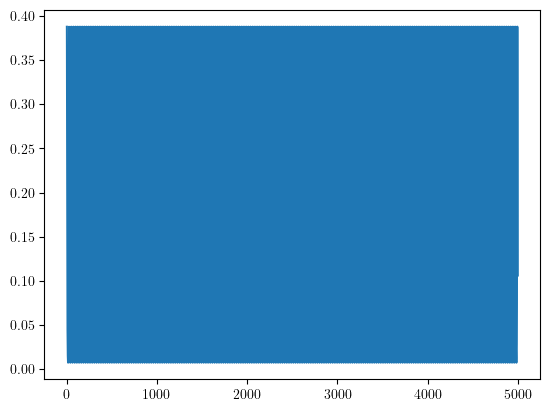

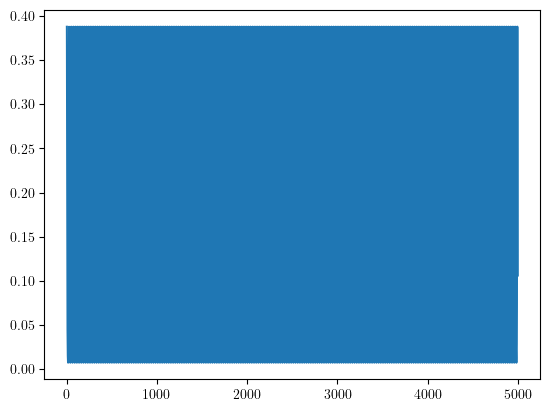

In [10]:
system1 = rsp(idx=0,model_name='gw0',**kws1)
system2 = rsp(idx=1,model_name='gw1',**kws1)